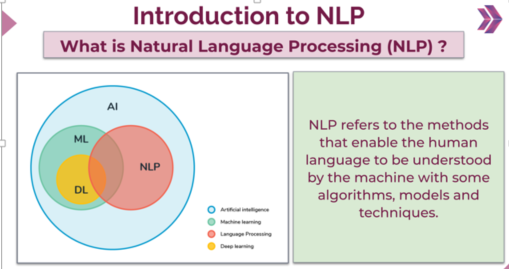

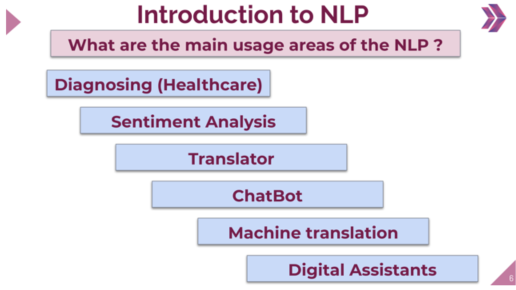

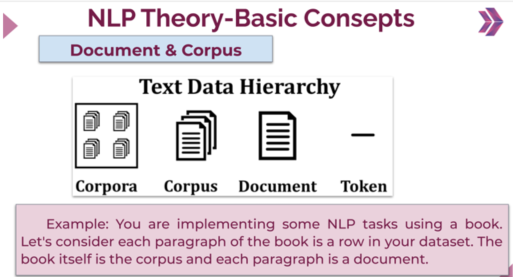

# Data Cleaning and Vectorization For NLP

## Install and Import

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [2]:
#!pip install nltk

## Tokenization

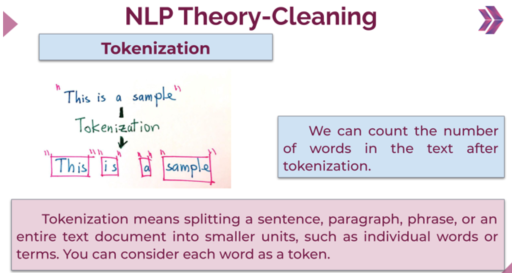

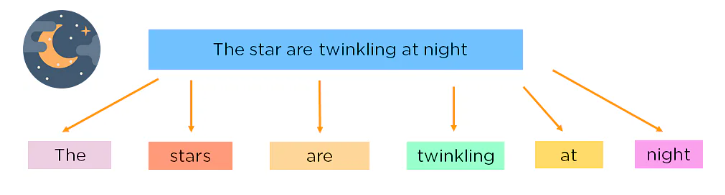

In [3]:
import nltk

In [4]:
# ilerleyen kodlarda isteyecegi kütüphaneleri en bastan yüklüyorum
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
sample_text= "Oh man, this is pretty cool. We will do more such things. 2 ½ % ()"

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize

# iki türlü tokenize var; santence ve word tokenize olarak,
# Genelde word_tokenize kullaniyoruz

In [7]:
sentence_token = sent_tokenize(sample_text.lower())
sentence_token  # noktayi(.) gördügü yerden itibaren cümle muamelesi yapar

['oh man, this is pretty cool.', 'we will do more such things.', '2 ½ %']

In [8]:
word_token = word_tokenize(sample_text.lower())
word_token  # her bosluktan itibaren token muamelesi yapar. 
# noktalama isaretleri ve özel karakterlere de token muamelesi yapiyor
# bunlarda bosluk aramaz, direkt token muamelesi yapar

['oh',
 'man',
 ',',
 'this',
 'is',
 'pretty',
 'cool',
 '.',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things',
 '.',
 '2',
 '½',
 '%']

## Removing Punctuation and Numbers

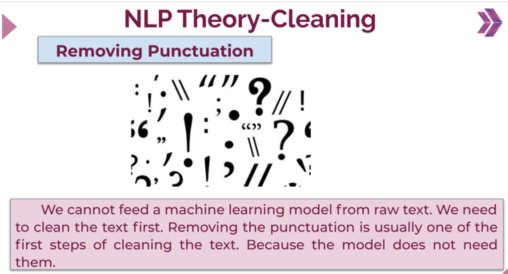

In [ ]:
# nltk.download('punkt')  # yukarida yazmistim

In [9]:
tokens_without_punc = [w for w in word_token if w.isalpha()] # .isalnum() for number and object
tokens_without_punc      # w.isalpha()==True da w.isalpha() ile ayni string mi degil mi
# tokens_without_punc = noktalama isareti ve sayi olmaksizin
# alfabetik olan tokenları tutarak noktalama işaretlerinin tamamını dışarda bıraktık.

['oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things']

## Removing Stopwords

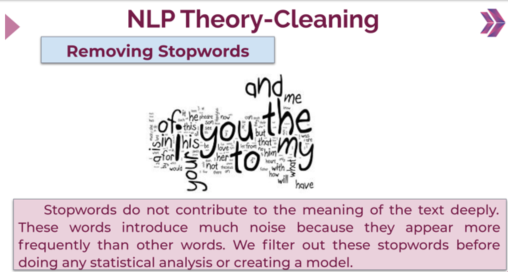

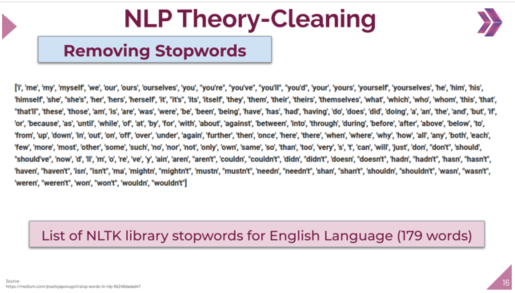

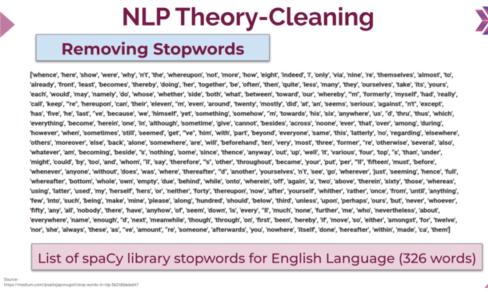

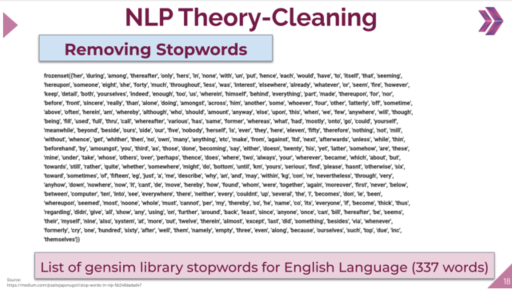

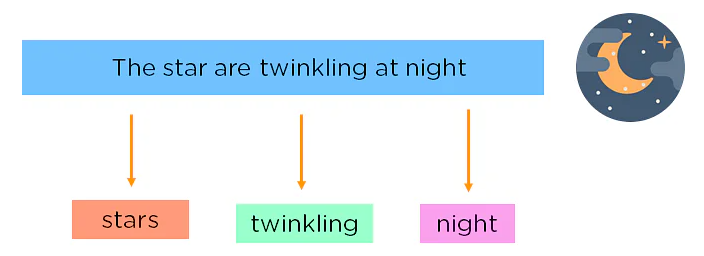

In [10]:
# nltk.download('stopwords')  # yukarida yazmistim

In [11]:
from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words("english")
stop_words  # english yerine baska dil de yazabilirim

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
tokens_without_punc  # noktalama isareti, özel karakter ve sayilardan temizlenmis hali 

['oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things']

In [14]:
token_without_sw = [t for t in tokens_without_punc if t not in stop_words] # if you don't make a sentiment analysis , 
                                                                           # you can remove negative auxiliary verb
token_without_sw                                               # duygu analizi yapmazsan olumsuz yardımcı fiili kaldırabilirsin
# burada da stopwords'leri dışarda bırakmış olduk.

['oh', 'man', 'pretty', 'cool', 'things']

In [15]:
# [i for i in stop_words if "n't" in i]

## Data Normalization-Lemmatization

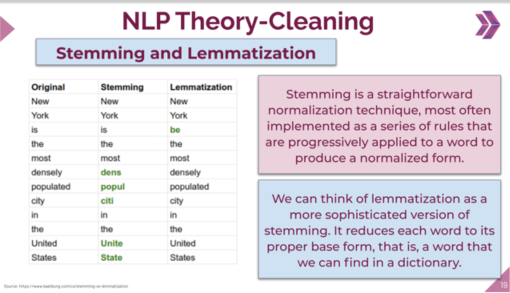

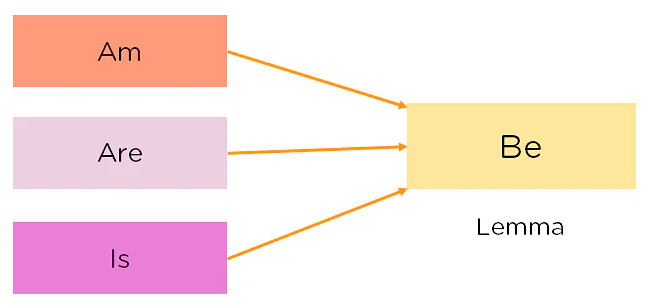

In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
#nltk.download('wordnet')  # yukarida yazmistim

In [18]:
WordNetLemmatizer().lemmatize("drove", pos="n")  # drove = sürü, defaultu pos="n" ==> noun yani isim

# pos="v" yazarsak verb demek fiilleri ilk haline dönüstürür

'drove'

In [ ]:
# Lemmatization anlam kaybi olup olmadigina bakarak kökenine indiriyor. 
# z.B: drove = sürü anlami oldugu icin bu sekilde birakti ve köküne inmedi

In [19]:
lem = [WordNetLemmatizer().lemmatize(t) for t in token_without_sw]

In [20]:
lem

['oh', 'man', 'pretty', 'cool', 'thing']

## Data Normalization-Stemming

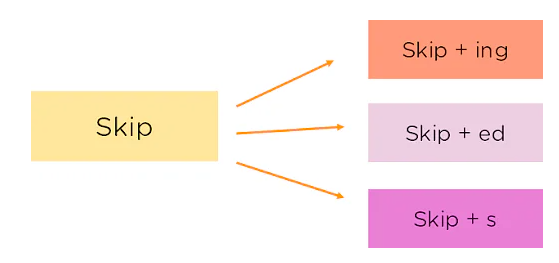

In [21]:
from nltk.stem import PorterStemmer

In [22]:
PorterStemmer().stem("driving")   # Stemming anlam kaybi olup olmadigina bakmaksizin kökenine indiriyor
# z.B: driving sürmek ve sürücü anlami olmasina ragmen kökenine indirdi

'drive'

In [23]:
WordNetLemmatizer().lemmatize("driving")

# stem driving'i drive'a çevirirken
# lemmatize driving olarak bırakıyor.

'driving'

In [24]:
stem = [PorterStemmer().stem(t) for t in token_without_sw]

In [25]:
stem

['oh', 'man', 'pretti', 'cool', 'thing']

## Joining

In [26]:
" ".join(lem)

'oh man pretty cool thing'

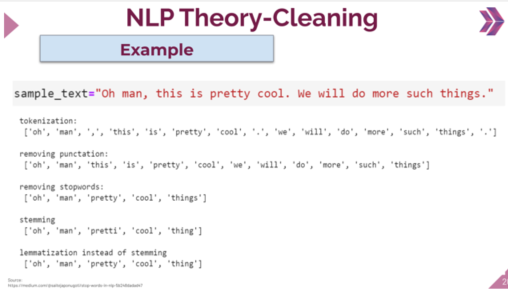

## Cleaning Function - for classification (NOT for sentiment analysis)

In [27]:
# Bu fonksiyonla textimizi clasification icin hazirlayabiliriz, ama sentiment (duygu) analizi icin olmaz.

In [28]:
# sadece classification yapacaksan bu fonksiyonu kullan.

# yukarda tek tek incelenen kodları bir fonksiyonda topladık.

def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [29]:
pd.Series(sample_text).apply(cleaning) #df["text"].apply(cleaning)

# cleaning fonksiyonunu uygulayabilmem için sample_text i series e çeviriyoruz.

# apply fonk sadece serilere uygulandigindan textimizi series cevirdik

0    oh man pretty cool thing
dtype: object

## Cleaning Function - for sentiment analysis

In [30]:
sample_text= "Oh man, this is pretty cool. We will do more such things. don't aren't are not. no problem"

In [31]:
s = sample_text.replace("'",'')
word = word_tokenize(s)
word 

['Oh',
 'man',
 ',',
 'this',
 'is',
 'pretty',
 'cool',
 '.',
 'We',
 'will',
 'do',
 'more',
 'such',
 'things',
 '.',
 'dont',
 'arent',
 'are',
 'not',
 '.',
 'no',
 'problem']

In [32]:
# Bu fonksiyonla textimizi sentiment (duygu) analizi icin hazirlayabiliriz.
# Olumlu-olumsuz cümleleri ayirdedebilmek icin not, no, ' stopwords ten cikariyoruz.

In [33]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
# hem classification hem duygu analizinde bunu kullanabilirsin.
# olumsuz yardımcı fiiler korunuyor.

for i in ["not", "no"]:
        stop_words.remove(i)

def cleaning_fsa(data):
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [35]:
pd.Series(sample_text).apply(cleaning_fsa)

# üstten virgülü kaldırmış olmasaydık stopword ler arasında olan aren't ı veya couldn't ı atmış olacaktı. 
# o yüzden yukardaki fonksiyonda ( text = re.sub('[^\w\s]','',sample_text) ) kodu ile üstten virgülü kaldırdık.

0    oh man pretty cool thing dont arent not no pro...
dtype: object

## CountVectorization and TF-IDF Vectorization

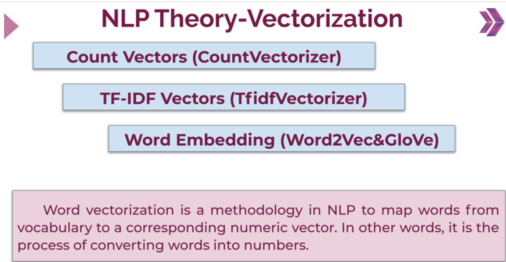

In [36]:
df = pd.read_csv("airline_tweets.csv")

In [37]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [38]:
df = df[['airline_sentiment','text']]
df

# NLP de biz "text" kısmıyla ve "label" kısmıyla ilgileniyoruz!!
# label ve texti kullaniyoruz

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [39]:
df = df.head(8)
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...


In [40]:
df2 = df.copy()

In [41]:
df2["text"] = df2["text"].apply(cleaning_fsa)

In [42]:
df2

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus youve added commercial expe...
2,neutral,virginamerica didnt today must mean need take ...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
5,negative,virginamerica seriously would pay flight seat ...
6,positive,virginamerica yes nearly every time fly vx ear...
7,neutral,virginamerica really missed prime opportunity ...


## CountVectorization

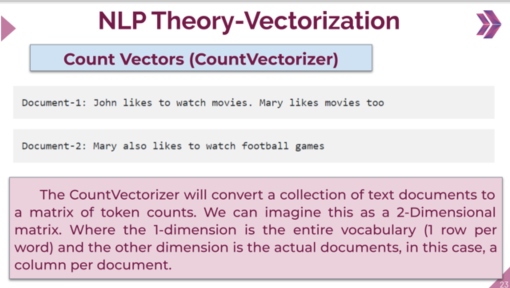

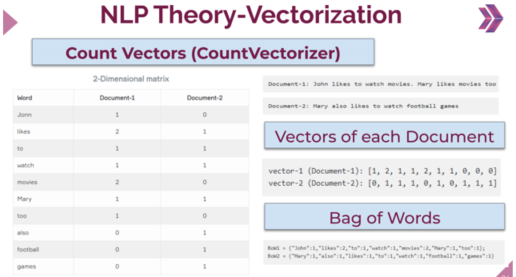

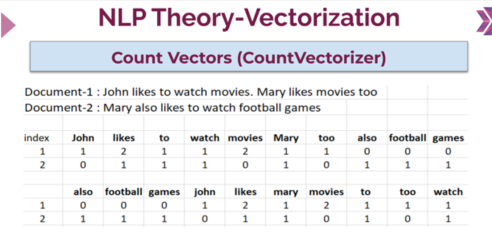

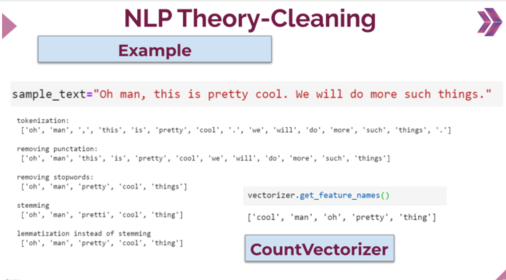

In [43]:
X = df2["text"]
y = df2["airline_sentiment"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 42)

# y'ler imbalans data ise stratify yapıyoruz.

# yukarda datadan sadece 8 satır aldığımız için test_size ı 0.5 gibi büyük bir değer olarak belirledik.
# normal çözümlerde biz yine test_size a 0.1 veya 0.2 gibi değerler vereceğiz

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# fit deyince train setindeki tum yorumlari(sentencelari) birlestirip unique olan bütün tokenleri buluyor, tespit ediyor. 
# transform deyince de once train seti icin bunlari teker teker sayıyor yani hangi kelimeden kaçar tane var tespit ediyor.
# daha sonra bunu ayni sekilde test seti icin yapiyor ancak
# x_testte gecen bir kelime x_trainde yoksa x_teste bu kelime ignore edilir
# dolayisi ile egitim yapilacak corpusun buyuklugu ve iceriginin onemi ortaya cikmis oluyor

# y'ler imbalance data ise stratify yapıyoruz.

# yukarda datadan sadece 8 satır aldığımız için test_size ı 0.5 gibi büyük bir değer olarak belirledik.
# normal çözümlerde biz yine test_size a 0.1 veya 0.2 gibi değerler vereceğiz

In [48]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# fit deyince train setindeki unique olan bütün tokenleri buluyor, tespit ediyor. 
# transform deyince de onları sayıyor yani hangi kelimeden kaçar tane var tespit ediyor..

In [51]:
# vectorizer.get_feature_names_out()

vectorizer.get_feature_names()

['another',
 'away',
 'bad',
 'big',
 'dhepburn',
 'didnt',
 'ear',
 'every',
 'fly',
 'go',
 'mean',
 'must',
 'nearly',
 'need',
 'really',
 'said',
 'take',
 'thing',
 'time',
 'today',
 'trip',
 'virginamerica',
 'vx',
 'worm',
 'yes']

In [52]:
X_train_count.toarray()

# tüm dokümanları array şekline getiriyoruz.

array([[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0]], dtype=int64)

In [54]:
# df_train_count = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

df_train_count = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())
df_train_count

# data olarak X_train_count.toarray() o al, column olarak vectorizer içindeki tüm featureların isimlerini al. 

,another,away,bad,big,dhepburn,didnt,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [55]:
X_train

6    virginamerica yes nearly every time fly vx ear...
0                          virginamerica dhepburn said
2    virginamerica didnt today must mean need take ...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [56]:
X_train[6]

'virginamerica yes nearly every time fly vx ear worm go away'

In [57]:
# df_test_count = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names_out())

df_test_count = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names())
df_test_count

,another,away,bad,big,dhepburn,didnt,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [58]:
X_test

3    virginamerica really aggressive blast obnoxiou...
5    virginamerica seriously would pay flight seat ...
1    virginamerica plus youve added commercial expe...
7    virginamerica really missed prime opportunity ...
Name: text, dtype: object

In [59]:
X_test[3]

'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'

In [60]:
vectorizer.vocabulary_

{'virginamerica': 21,
 'yes': 24,
 'nearly': 12,
 'every': 7,
 'time': 18,
 'fly': 8,
 'vx': 22,
 'ear': 6,
 'worm': 23,
 'go': 9,
 'away': 1,
 'dhepburn': 4,
 'said': 15,
 'didnt': 5,
 'today': 19,
 'must': 11,
 'mean': 10,
 'need': 13,
 'take': 16,
 'another': 0,
 'trip': 20,
 'really': 14,
 'big': 3,
 'bad': 2,
 'thing': 17}

## TF-IDF

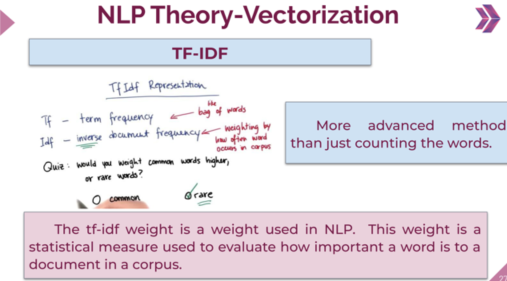

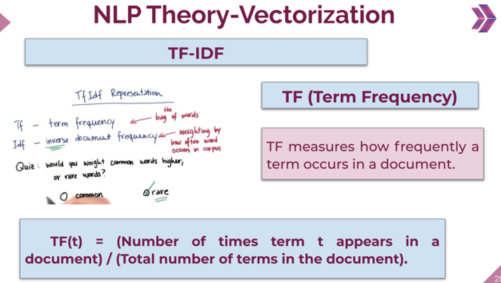

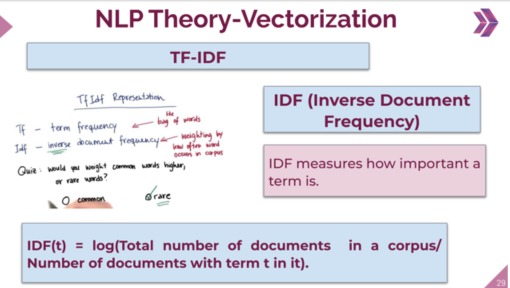

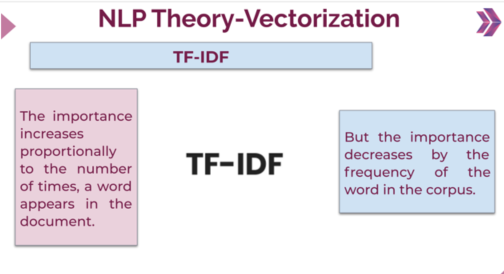

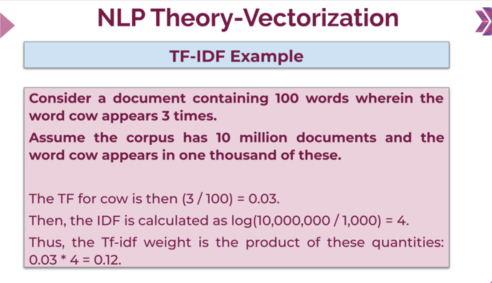

sklearn TD-IDF
https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)


# fit burada tüm tokenleri sayıyor. sonra da teker teker öncelikle TF fonksiyonunu uyguluyor. 
#  sonra IDF bulmak için bu kelimeler tüm dokümanlarda geçmiş mi geçmemiş mi onları sayıyor. 
# transform deyince de TF-IDF katsayısını hesaplayıp buluyor.

In [65]:
# tf_idf_vectorizer.get_feature_names_out()

tf_idf_vectorizer.get_feature_names()

['another',
 'away',
 'bad',
 'big',
 'dhepburn',
 'didnt',
 'ear',
 'every',
 'fly',
 'go',
 'mean',
 'must',
 'nearly',
 'need',
 'really',
 'said',
 'take',
 'thing',
 'time',
 'today',
 'trip',
 'virginamerica',
 'vx',
 'worm',
 'yes']

In [66]:
X_train_tf_idf.toarray()

array([[0.        , 0.31200802, 0.        , 0.        , 0.        ,
        0.        , 0.31200802, 0.31200802, 0.31200802, 0.31200802,
        0.        , 0.        , 0.31200802, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31200802, 0.        ,
        0.        , 0.16281873, 0.31200802, 0.31200802, 0.31200802],
       [0.        , 0.        , 0.        , 0.        , 0.66338461,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.66338461, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.34618161, 0.        , 0.        , 0.        ],
       [0.34768534, 0.        , 0.        , 0.        , 0.        ,
        0.34768534, 0.        , 0.        , 0.        , 0.        ,
        0.34768534, 0.34768534, 0.        , 0.34768534, 0.        ,
        0.        , 0.34768534, 0.        , 0.        , 0.34768534,
        0.34768534, 0.18143663, 0.        , 0.

In [67]:
# df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())
df_train_tfidf

# loc[0] da da virginamerica nın en düşük ağırlığa sahip olduğunu görüyoruz. 

,another,away,bad,big,dhepburn,didnt,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0.000000,0.312008,0.000000,0.000000,0.000000,0.000000,0.312008,0.312008,0.312008,0.312008,0.000000,0.000000,0.312008,0.000000,0.000000,0.000000,0.000000,0.000000,0.312008,0.000000,0.000000,0.162819,0.312008,0.312008,0.312008
1,0.000000,0.000000,0.000000,0.000000,0.663385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.663385,0.000000,0.000000,0.000000,0.000000,0.000000,0.346182,0.000000,0.000000,0.000000
2,0.347685,0.000000,0.000000,0.000000,0.000000,0.347685,0.000000,0.000000,0.000000,0.000000,0.347685,0.347685,0.000000,0.347685,0.000000,0.000000,0.347685,0.000000,0.000000,0.347685,0.347685,0.181437,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.483803,0.483803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483803,0.000000,0.000000,0.483803,0.000000,0.000000,0.000000,0.252468,0.000000,0.000000,0.000000


In [68]:
X_train[6]

'virginamerica yes nearly every time fly vx ear worm go away'

In [69]:
df_train_tfidf.loc[1].sort_values(ascending=False)

# virginamerica tüm dokümanlarda geçtiği için doğal olarak onun ağırlığını azaltmış. en hafifi o olmuş.

dhepburn         0.663385
said             0.663385
virginamerica    0.346182
another          0.000000
need             0.000000
worm             0.000000
vx               0.000000
trip             0.000000
today            0.000000
time             0.000000
thing            0.000000
take             0.000000
really           0.000000
nearly           0.000000
away             0.000000
must             0.000000
mean             0.000000
go               0.000000
fly              0.000000
every            0.000000
ear              0.000000
didnt            0.000000
big              0.000000
bad              0.000000
yes              0.000000
Name: 1, dtype: float64

In [70]:
df_test_tfidf=pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())
df_test_tfidf

,another,away,bad,big,dhepburn,didnt,ear,every,fly,go,mean,must,nearly,need,really,said,take,thing,time,today,trip,virginamerica,vx,worm,yes
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886548,0.0,0.0,0.000000,0.0,0.0,0.0,0.462637,0.0,0.0,0.0
1,0.0,0.0,0.483803,0.0,0.0,0.483803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483803,0.0,0.0,0.483803,0.0,0.0,0.0,0.252468,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886548,0.0,0.0,0.000000,0.0,0.0,0.0,0.462637,0.0,0.0,0.0


In [71]:
X_test[3]

'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'

In [72]:
np.log10(4/100)

-1.3979400086720375

In [73]:
np.log10(100/4)

1.3979400086720377

In [74]:
np.log10(10000000/3)

6.522878745280337